In [8]:
# Auto-download CSV from GitHub for Edunet Smart Irrigation Project
!wget "https://raw.githubusercontent.com/tasmiya-77/Smart_irrigation/refs/heads/main/irrigation_machine.csv" -O irrigation_machine.csv

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load CSV
data = pd.read_csv("irrigation_machine.csv")
data.head()


--2025-07-18 10:54:07--  https://raw.githubusercontent.com/tasmiya-77/Smart_irrigation/refs/heads/main/irrigation_machine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181246 (177K) [text/plain]
Saving to: ‘irrigation_machine.csv’

irrigation_machine. 100%[===================>] 177.00K  --.-KB/s    in 0.01s   

2025-07-18 10:54:08 (12.3 MB/s) - ‘irrigation_machine.csv’ saved [181246/181246]



,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [9]:
# Display dataset information
print(data.info())

# Display column names
print(data.columns)

# Display descriptive statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [10]:
# Drop 'Unnamed: 0' if present
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)


In [11]:
# Split features and labels
X = data.iloc[:, 0:20]   # sensor columns
y = data.iloc[:, 20:]    # parcel columns

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (2000, 20)
Labels shape: (2000, 3)


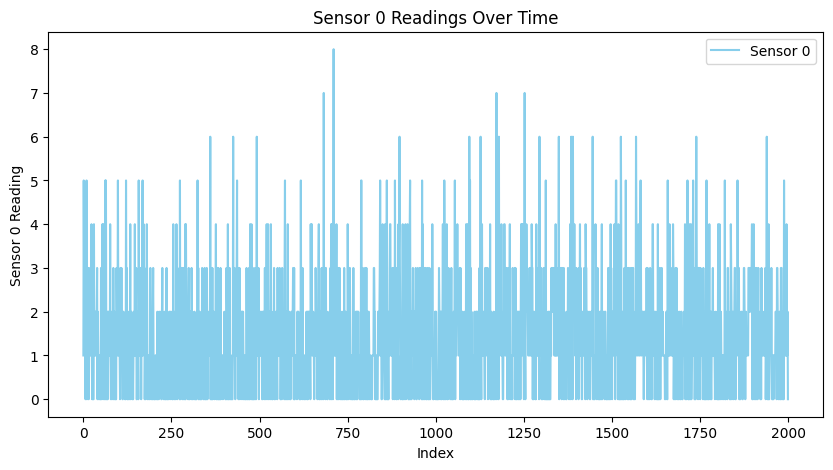

In [12]:
plt.figure(figsize=(10,5))
plt.plot(X.index, X['sensor_0'], label='Sensor 0', color='skyblue')
plt.xlabel('Index')
plt.ylabel('Sensor 0 Reading')
plt.title('Sensor 0 Readings Over Time')
plt.legend()
plt.show()
